In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as sci
import matplotlib.pyplot as plt 
import statsmodels.api as st
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

In [2]:
data = pd.read_csv('/Users/misaalsingh/Documents/Data_Mining_Proj/Maven_Business_School(final).csv')
data = data.fillna(0)
data = data.replace(['Business', 'Computer Science', 'Finance', 'Engineering', 'Art'], [1,2,3,4,5])
data = data.replace(['Yes', 'No'], [1,0])
data = data.replace(['Placed', 'Not Placed'], [1,0])

data

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,570,5,56.8,54.0,0,221.0,62.000000,0,0.0000
1,779,3,47.3,44.9,0,203.0,62.000000,1,107000.0000
2,582,2,60.4,57.4,0,220.0,76.000000,1,149666.6667
3,791,1,52.1,49.5,0,202.0,76.000000,1,132500.0000
4,576,1,58.6,55.7,1,220.0,98.000000,1,182333.3333
...,...,...,...,...,...,...,...,...,...
1155,204,3,75.0,71.3,0,252.0,687.561313,1,193666.6667
1156,205,5,80.0,76.0,0,252.0,690.019102,0,0.0000
1157,206,1,85.0,80.8,1,252.0,692.476891,1,100500.0000
1158,207,2,90.0,85.5,0,252.0,694.934680,1,182333.3333


In [3]:
col = ['Undergrad Degree', 'Undergrad Grade','MBA Grade', 'Work Experience',
       'Employability (Before)', 'Employability (After)', 'Status']
data = data.replace(['Placed', 'Not Placed'], [1,0])
x = data[col]
y = data['Annual Salary']
scaler = StandardScaler()
scaler.fit_transform(x,y)

array([[ 1.44170761,  0.01484491, -0.01742535, ...,  0.13859454,
        -1.80427104, -1.21381529],
       [ 0.03279369, -0.4117952 , -0.43358372, ..., -0.30895479,
        -1.80427104,  0.82384858],
       [-0.67166328,  0.17651905,  0.13806239, ...,  0.11373069,
        -1.6927752 ,  0.82384858],
       ...,
       [-1.37612024,  1.28129239,  1.2081839 , ...,  0.90937395,
         3.21683979,  0.82384858],
       [-0.67166328,  1.50583981,  1.42312284, ...,  0.90937395,
         3.23641359,  0.82384858],
       [ 0.73725065,  1.76631483,  1.67464713, ...,  0.90937395,
         3.25598739, -1.21381529]])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=10)
model = RidgeCV(alphas=np.arange(0.01, 1, 0.01), cv=None, scoring='r2', 
               store_cv_values=True)
model.fit(x_train, y_train)

y_pred_r = model.predict(x_test)

mae = metrics.mean_absolute_error(y_test, y_pred_r)
mse = metrics.mean_squared_error(y_test, y_pred_r)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, y_pred_r)

print("Accuracy of Regression:\n")
print("MAE:",mae)
print("RMSE:", rmse)
print("R-Squared:", r2)

Accuracy of Regression:

MAE: 21074.670651434568
RMSE: 38185.73036341601
R-Squared: 0.7174709309179599


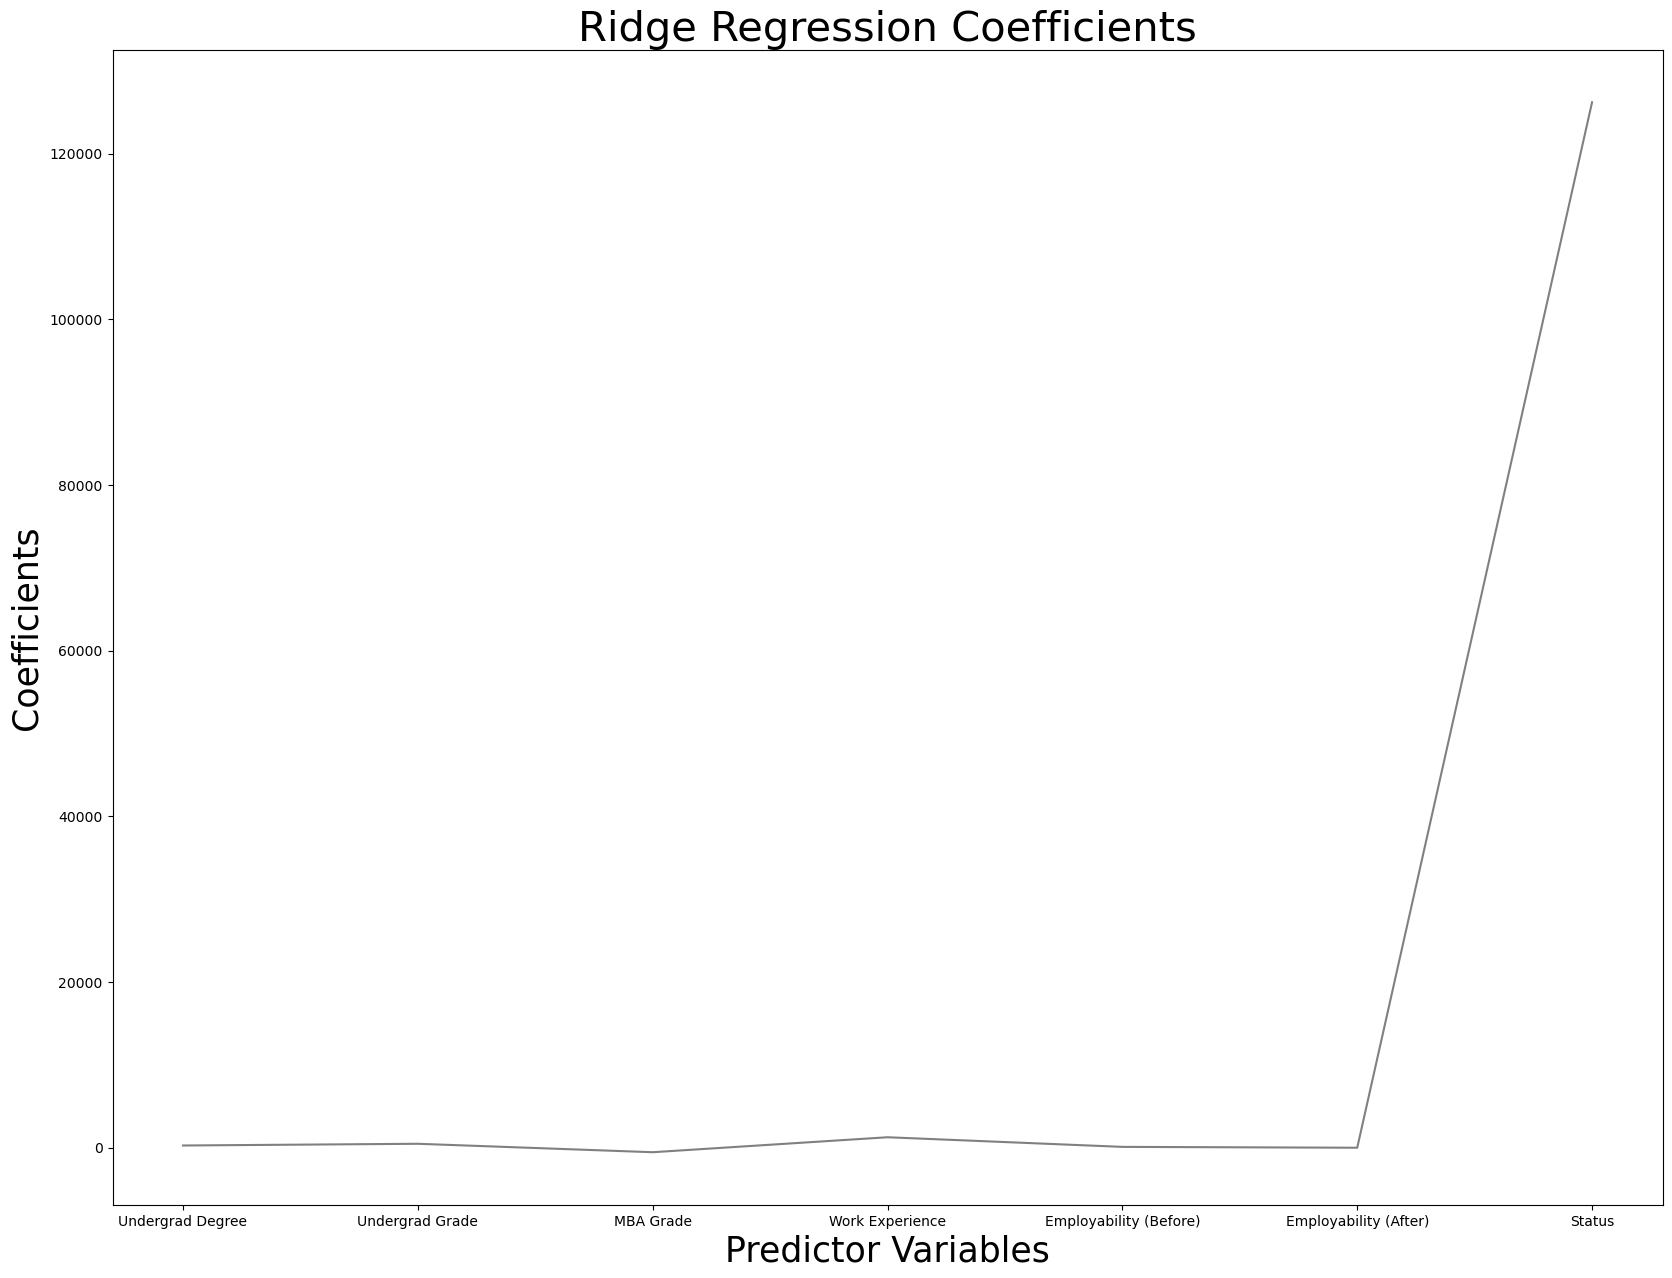

[ 2.43496308e+02  4.50732331e+02 -5.68437511e+02  1.23936360e+03
  7.70638099e+01 -2.65285122e+01  1.26209992e+05]


In [5]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=30) 
plt.rc('axes', labelsize=25) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)  
fig = plt.figure(figsize=(20,15))  


plt.style.use('tableau-colorblind10')
plt.plot(['Undergrad Degree', 'Undergrad Grade','MBA Grade', 'Work Experience' ,'Employability (Before)', 'Employability (After)', 'Status'],
        model.coef_, 'grey')
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.show()
print(model.coef_)

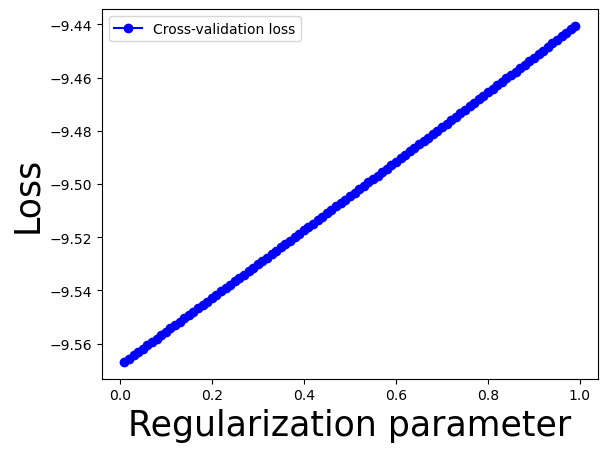

In [6]:
alphas = np.arange(0.01, 1, 0.01)
cv_losses = model.cv_values_.mean(axis=0)
plt.plot(alphas, cv_losses, 'o-', color="b", label="Cross-validation loss")
plt.legend(loc="best")
plt.xlabel("Regularization parameter")
plt.ylabel("Loss")
plt.show()

#graph that shows which alpha level

In [7]:
model = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, n_jobs=-1)
model.fit(x_train, y_train)

y_pred_r = model.predict(x_test)

mae = metrics.mean_absolute_error(y_test, y_pred_r)
mse = metrics.mean_squared_error(y_test, y_pred_r)
rmse = np.sqrt(mse)   
r2 = metrics.r2_score(y_test, y_pred_r)

print("Accuracy of Regression:\n")
print("MAE:",mae)
print("RMSE:", rmse)
print("R-Squared:", r2)

Accuracy of Regression:

MAE: 21121.65583285864
RMSE: 38205.40053612495
R-Squared: 0.7171797841000452


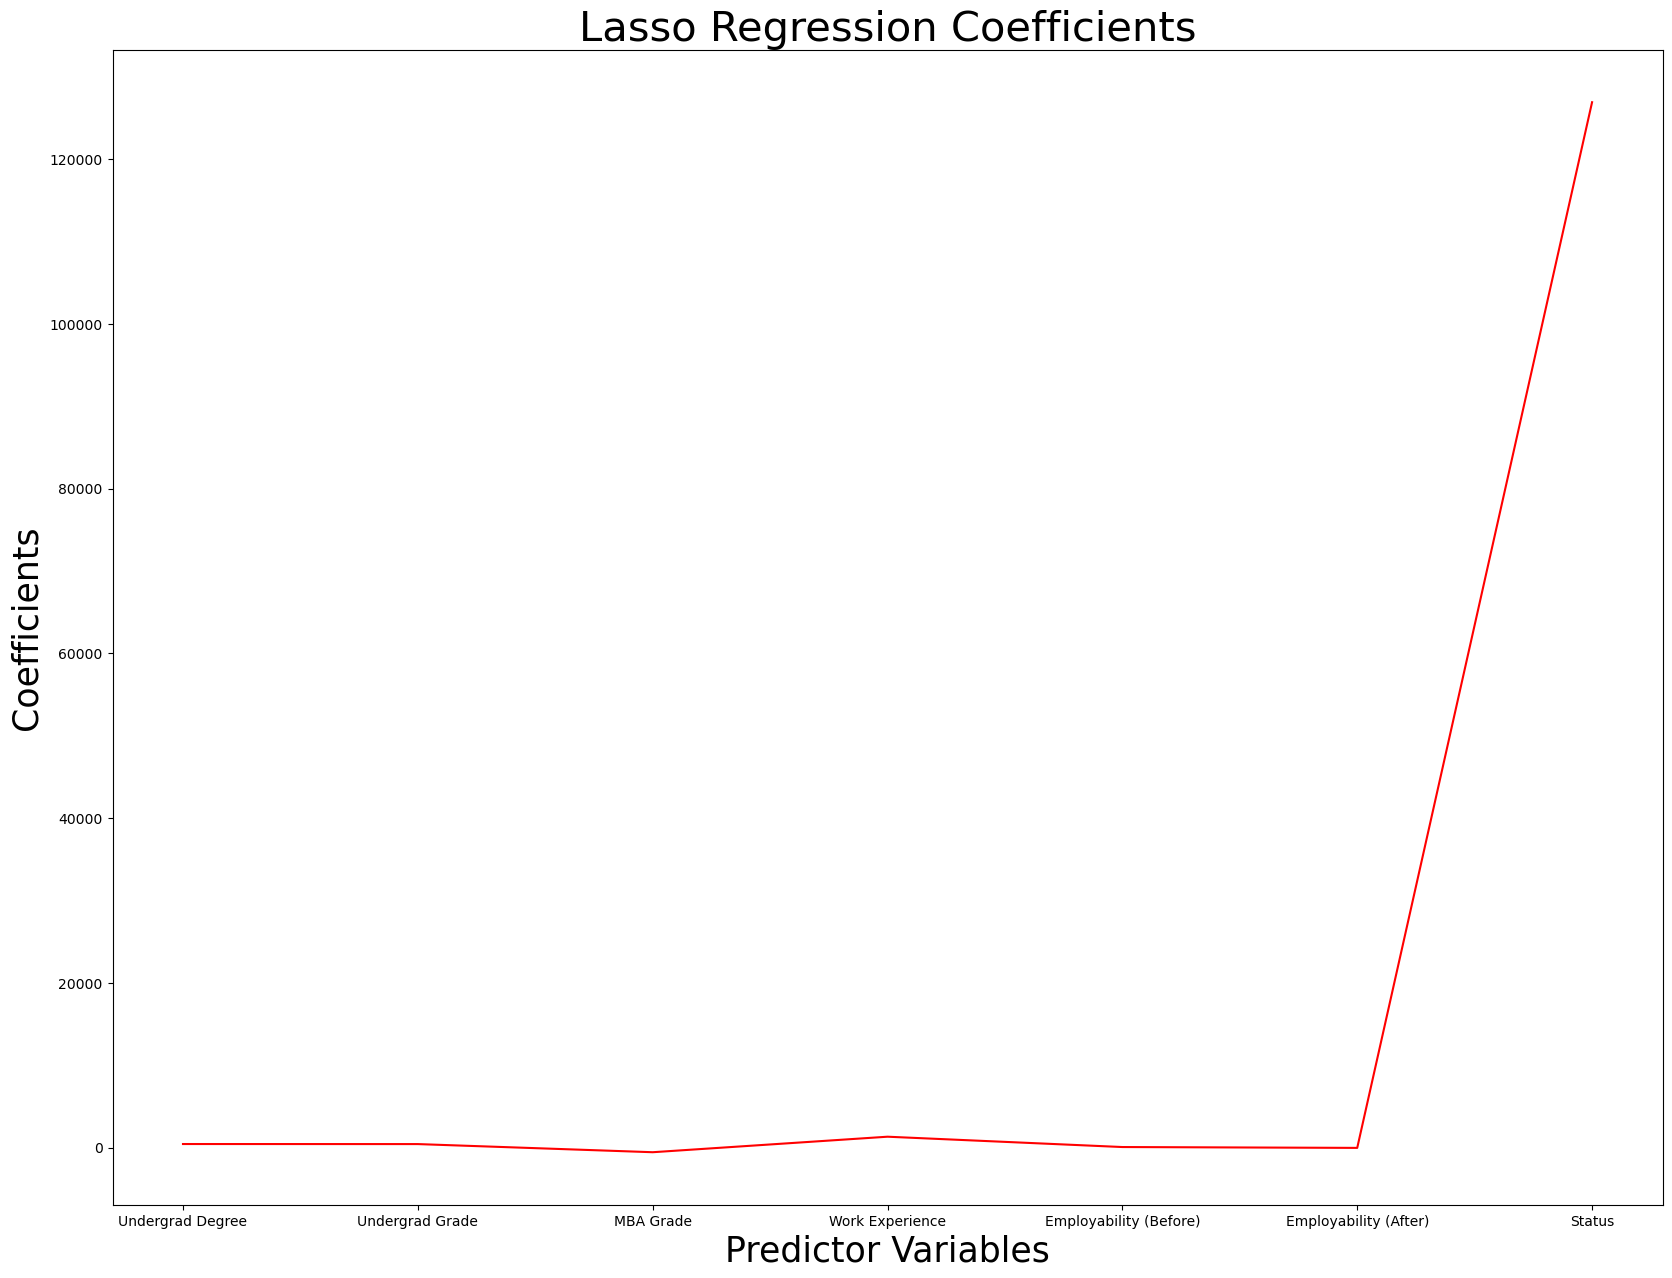

[ 4.42474861e+02  4.35517761e+02 -5.52490842e+02  1.33086497e+03
  7.64610850e+01 -2.65212519e+01  1.26902182e+05]









In [8]:
#controls default text size
plt.rc('axes', titlesize=30) 
plt.rc('axes', labelsize=25) 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)  
fig = plt.figure(figsize=(20,15))    



plt.style.use('tableau-colorblind10')
plt.plot(['Undergrad Degree', 'Undergrad Grade','MBA Grade', 'Work Experience' ,'Employability (Before)', 'Employability (After)', 'Status'],
        model.coef_, 'r')
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.show()
print(model.coef_)

for i in model.coef_:
    print('')
